In [1]:
import pandas as pd
import openpyxl
import xlrd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [5]:
tablas20_1 = glob.glob("C:/Users/Javier/Documents/GIT/Repositories/TFM-Textil-Santanderina/data/raw/2015*.xlsx")
tablas20_2 = glob.glob("C:/Users/Javier/Documents/GIT/Repositories/TFM-Textil-Santanderina/data/raw/2016*.xlsx")
tablas20_3 = glob.glob("C:/Users/Javier/Documents/GIT/Repositories/TFM-Textil-Santanderina/data/raw/2017*.xlsx")
tablas20_4 = glob.glob("C:/Users/Javier/Documents/GIT/Repositories/TFM-Textil-Santanderina/data/raw/2018*.xlsx")
# tablas20_5 = glob.glob("C:/Users/Javier/Documents/GIT/Repositories/TFM-Textil-Santanderina/data/raw/2019*.xlsx")
tablas20_all = list([tablas20_1,tablas20_2,tablas20_3, tablas20_4])

In [6]:
pmf_group1 = np.empty(0)

empty_array = np.empty(0)

first_week = np.arange(1,9)
second_week = np.arange(9,17)
third_week = np.arange(17,25)
fourth_week = np.arange(25,32)

first_week_february = np.arange(1,8)
second_week_february = np.arange(8, 15)
third_week_february = np.arange(15, 22)
fourth_week_february = np.arange(22, 30)




for year in tablas20_all:
    for data in year:
        ## we open each year and then each excel related to each month:
        df = pd.read_excel(data, engine='openpyxl')
        
        ## we filter the date info inside the fecha column:
        df['year'] = pd.DatetimeIndex(df['Fecha']).year
        df['month'] = pd.DatetimeIndex(df['Fecha']).month
        df['day'] = pd.DatetimeIndex(df['Fecha']).day
        
        ## we filter only the bill lines which are commercial invices (values 'F' of the 'TipoDoc' Column):
        df_f = df.loc[df['TipoDoc'].isin(['F'])]
        
        
        ## we filter for the first family of products:
        df_g = df_f.loc[df_f['GrupoArticulo'].isin([1])]
        
#         ##we generate for each iteration(month tabulear data) we refresh the fm  and weeks as empty arrays:
#         fm = empty_array
#         first_week_importe = empty_array
#         second_week_importe = empty_array
#         third_week_importe = empty_array
#         fourth_week_importe = empty_array
    
        if df['month'][0] == 2:
            df_w1 = df_g.loc[df_g['day'].isin(first_week_february)]
            df_w2 = df_g.loc[df_g['day'].isin(second_week_february)]
            df_w3 = df_g.loc[df_g['day'].isin(third_week_february)]
            df_w4 = df_g.loc[df_g['day'].isin(fourth_week_february)]
        
        
        else:
            df_w1 = df_g.loc[df_g['day'].isin(first_week)]
            df_w2 = df_g.loc[df_g['day'].isin(second_week)]
            df_w3 = df_g.loc[df_g['day'].isin(third_week)]
            df_w4 = df_g.loc[df_g['day'].isin(fourth_week)]
        
        
            ## we generate for each total week the total billed quantity, by filtering the column:
            first_week_importe = df_w1['Importe'].sum()
            second_week_importe = df_w2['Importe'].sum()
            third_week_importe = df_w3['Importe'].sum()
            fourth_week_importe = df_w4['Importe'].sum()
            print(first_week_importe)
            ## we store the last fourth arrays in one called fm (facturacion del mes, billed amount of the month):
            fm = np.array([first_week_importe,second_week_importe, third_week_importe,fourth_week_importe])
        
            #we append to the general array the result of the fourth weeks of the loaded month:
            pmf_group1 = np.append(pmf_group1, fm)
            print(pmf_group1.shape)

4616067.85
(4,)
129660157.89000002
(8,)
30207691.080000006
(12,)
22161407.61
(16,)
86594778.38000001
(20,)
34472082.46
(24,)
84783954.30000004
(28,)
108154397.08999999
(32,)
49626889.84
(36,)
41476526.099999994
(40,)
75670256.61
(44,)
9279420.79
(48,)
135499852.95
(52,)
38205321.79000001
(56,)
28365567.529999997
(60,)
19745954.360000003
(64,)
381394.54999999993
(68,)
31138351.54
(72,)
7340350.78
(76,)
30628473.53999999
(80,)
5914061.08
(84,)
5774497.869999999
(88,)
167990790.94000003
(92,)
175892475.04999998
(96,)
120960412.72999999
(100,)
36072160.63
(104,)
266803857.00999996
(108,)
20773130.46
(112,)
21848709.929999996
(116,)
40990365.5
(120,)
33830687.029999994
(124,)
68008921.00999999
(128,)
6209781.909999998
(132,)
33578545.36
(136,)
137699005.66999996
(140,)
177931403.29000002
(144,)
16440991.450000001
(148,)
42782169.89
(152,)
25872986.63
(156,)
234670.12000000005
(160,)
14928106.3
(164,)
3740927.2199999997
(168,)
6759747.3100000005
(172,)
22987904.189999998
(176,)


In [7]:
X = np.arange(1,177)
y = pmf_group1

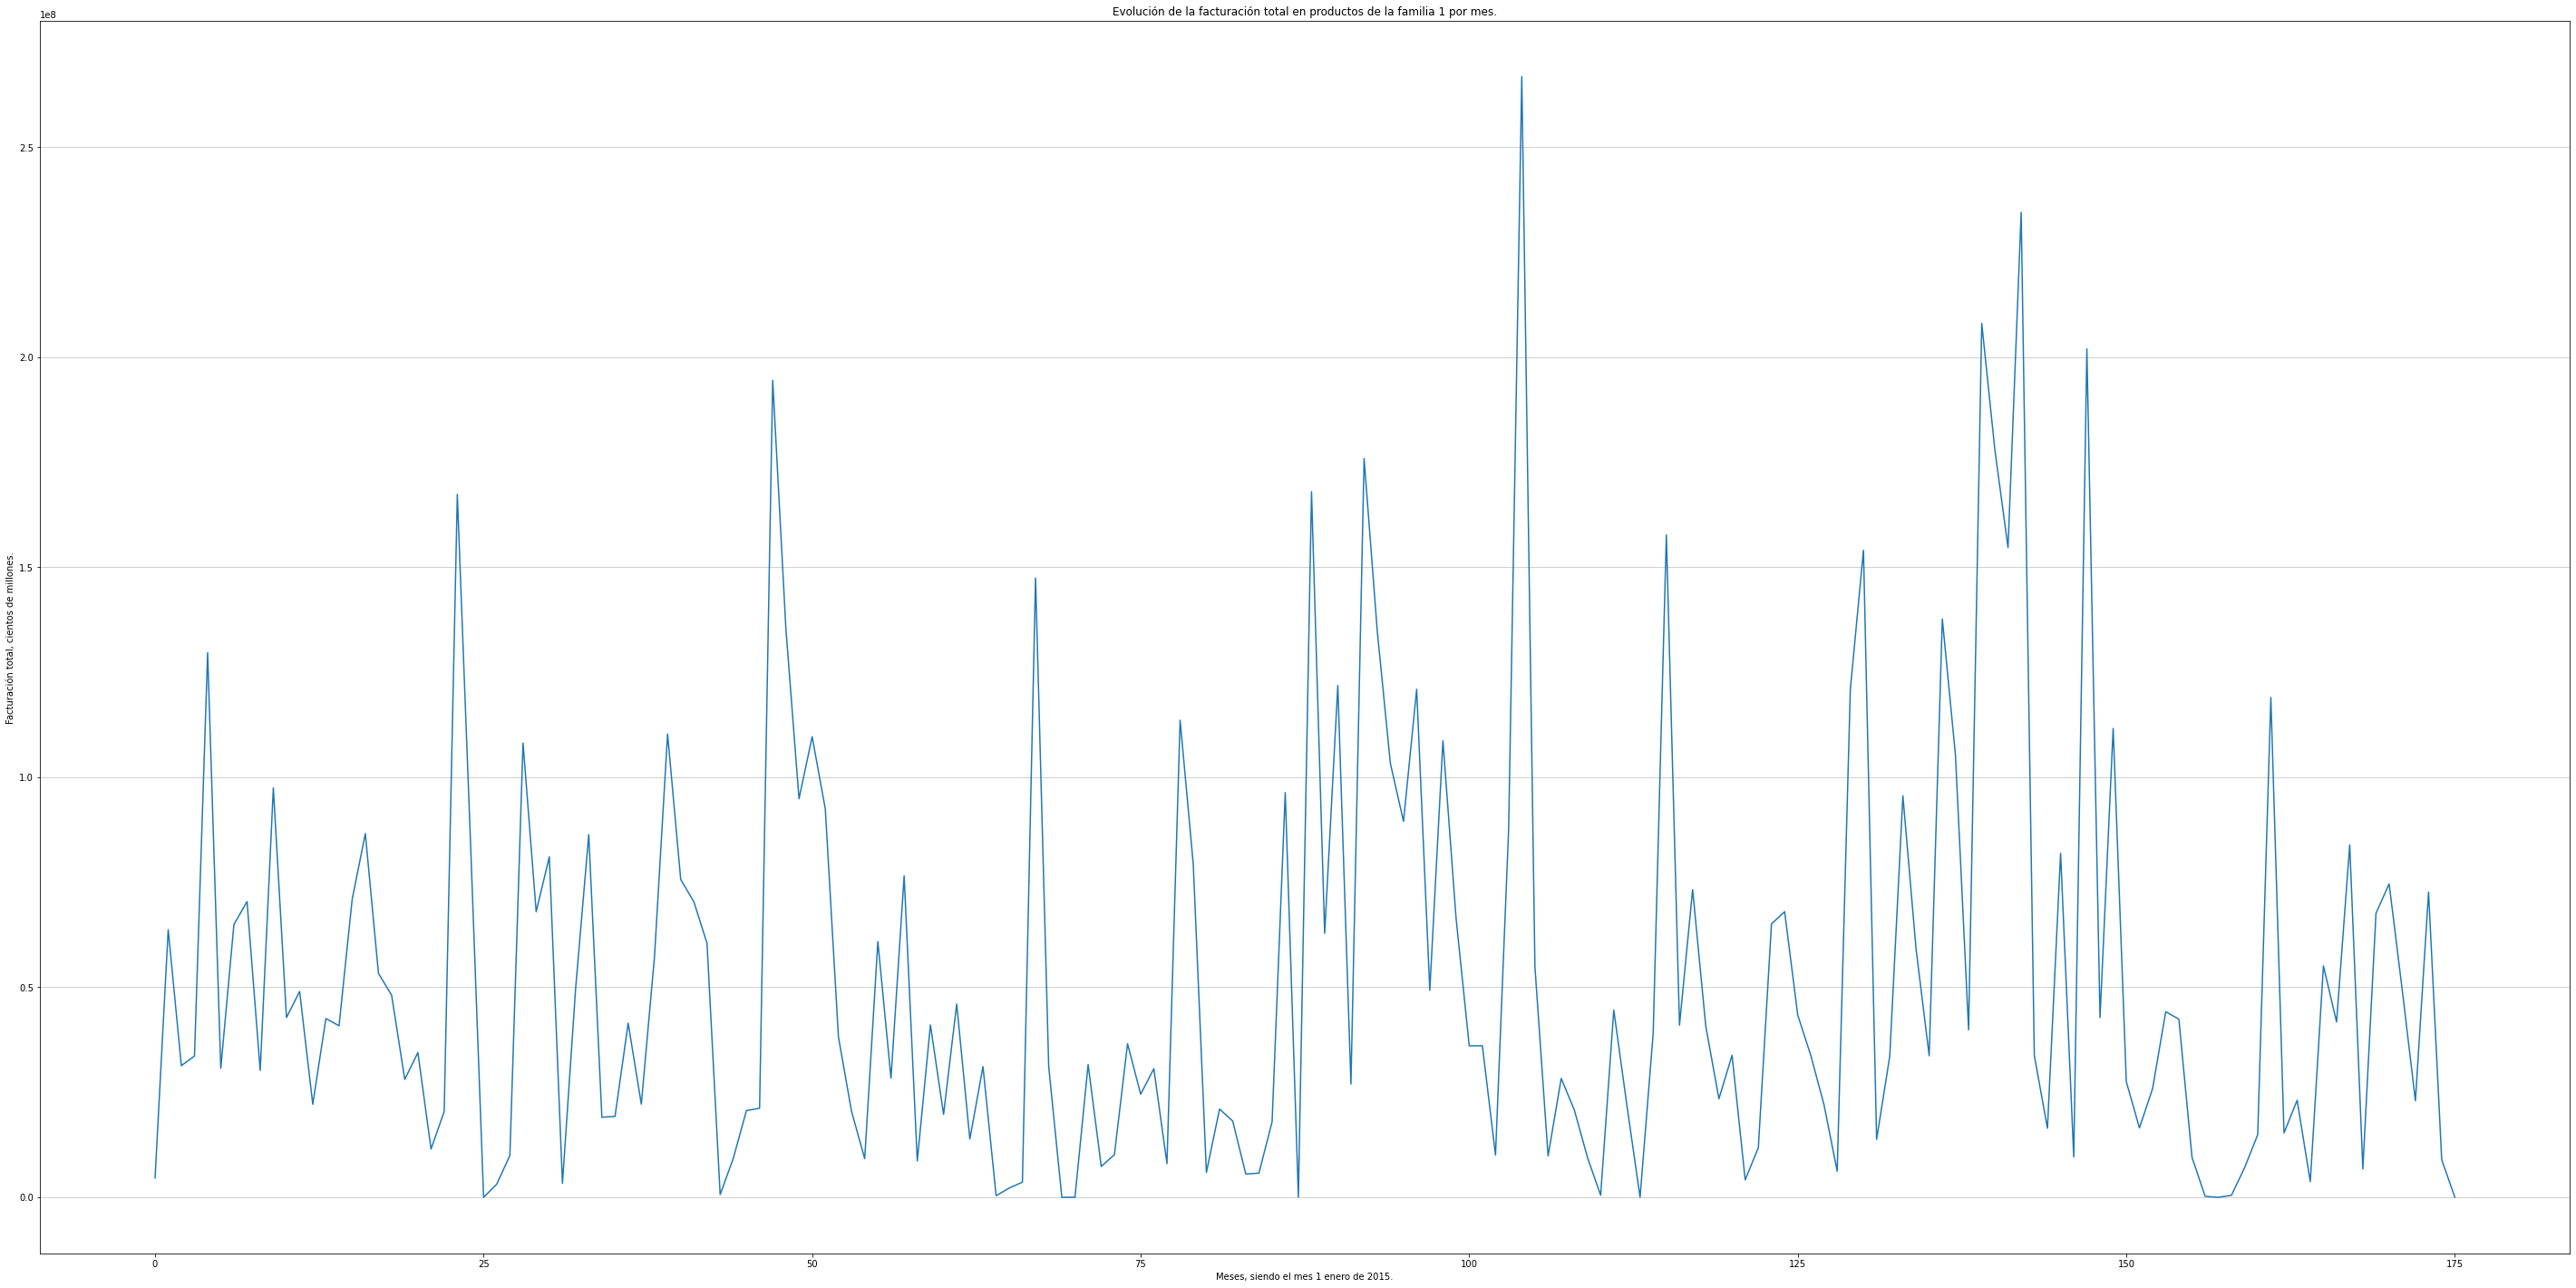

In [16]:
from pylab import rcParams
ax = plt.figure().add_subplot(111)
ax.plot(y)
plt.title('Evolución de la facturación total en productos de la familia 1 por mes.')
plt.xlabel('Meses, siendo el mes 1 enero de 2015.')
plt.ylabel('Facturación total, cientos de millones.')

plt.grid(axis='y', alpha=0.75)

rcParams['figure.figsize'] = 50, 25